In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re

# Base path for Kaggle input directory
base_path = '/kaggle/input/projet-ter/'  # Update this path if it's different
#!pip install GPUtil
'''
import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()
*/
'''

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'\nimport torch\nfrom GPUtil import showUtilization as gpu_usage\nfrom numba import cuda\n\ndef free_gpu_cache():\n    print("Initial GPU Usage")\n    gpu_usage()                             \n\n    torch.cuda.empty_cache()\n\n    cuda.select_device(0)\n    cuda.close()\n    cuda.select_device(0)\n\n    print("GPU Usage after emptying the cache")\n    gpu_usage()\n\nfree_gpu_cache()\n*/\n'

In [5]:
file_names = [
    "articles_24 Heures au BCnin.www.24haubenin.info_.csv",
    "articles_Africa 24.www.youtube.com_channel_UCmEcEP_oCZJ6Mr1uxhUFyRg.csv",
    "articles_Agence de Presse Sngalaise Youtube.www.youtube.com_channel_UC8uoOv4RSzdZKlmPTguYjtg.csv",
    "articles_Agence de Presse Sngalaise.www.aps.sn_.csv",
    "articles_Banouto Media.www.youtube.com_channel_UCwsXkG4LatsF7u_b8dU1p-w.csv",
    "articles_Banouto.www.banouto.bj_.csv",
    "articles_Burkina24 Youtube.www.youtube.com_channel_UCJtaDORHQO20XA-tFwpJysQ.csv",
    "articles_Burkina24.burkina24.com_.csv",
    "articles_Dakaractu TV HD.www.youtube.com_channel_UCG0t6XiAHui-ziz7SwFTN0g.csv",
    "articles_Dakaractu.www.dakaractu.com_.csv",
    "articles_Fraternit.www.fraternitebj.info_.csv",
    "articles_JeuneAfrique Youtube.www.youtube.com_channel_UCWkbzzrku8lwKK6DoBl4yTg.csv",
    "articles_JeuneAfrique.www.jeuneafrique.com_.csv",
    "articles_LObs.www.lobs.sn_.csv",
    "articles_La Nation.lanation.bj_.csv",
    "articles_La Nouvelle Tribune.lanouvelletribune.info_.csv",
    "articles_Le Matinal.groupelematinal.com_category_actualites_.csv",
    "articles_Le Quotidien.lequotidien.sn_.csv",
    "articles_ORTB.www.youtube.com_channel_UCmPXzeJaO7nrA87GIz3N6wQ.csv",
    "articles_RTB - Radiodiffusion Tlvision du Burkina.www.youtube.com_channel_UCZl9utbYlPMssMhgrGUqXZA.csv",
    "articles_SIKKA TELEVISION.www.youtube.com_channel_UCplwKOWLV8s2XZBMsimOjvg.csv",
    "articles_Senegal7.www.youtube.com_channel_UC5eVGjO4ITJA1KM_tva_OSQ.csv",
    "articles_Sud Quotidien TV.www.youtube.com_channel_UCD-YykHgK3BOvnqFlcOFXIA.csv",
    "articles_Sud Quotidien.www.sudquotidien.sn_.csv",
    "articles_TFM (Tl Futurs Medias).www.youtube.com_channel_UC5NQ49FVRIAuWE1el6L2gkg.csv",
    "articles_aCotonou Youtube.www.youtube.com_channel_UCdNz-U4WJwFvbMDMdgYNMrg.csv",
    "articles_aCotonou.news.acotonou.com_.csv",
    "articles_le faso.lefaso.net_.csv",
    "articles_le soleil.lesoleil.sn_.csv",
]

# Initialiser une liste vide pour stocker des trames de données
dfs = []

# Boucle principale
for file_name in file_names:
    file_path = f"{base_path}{file_name}"
    
    #  Lire chaque fichier dans une trame de données
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
        if 'source' in df.columns and not df['source'].str.contains('youtube.com').any():
            dfs.append(df)

# Concaténer toutes les données en une seule
combined_df = pd.concat(dfs, ignore_index=True)

print(f"\nTotal number of records in the combined dataframe: {len(combined_df)}")


Total number of records in the combined dataframe: 23894


In [6]:
combined_df.head()

,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_id,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic
0,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...,Passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?Passer-de-75-a-10...,FR,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Environement (m)
1,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...,Le procès des personnes arrêtées au CNHU renvo...,https://www.24haubenin.info/?Le-proces-des-per...,FR,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Societe (m)
2,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...,Nouvel enrôlement au Ravip pour les femmes et ...,https://www.24haubenin.info/?Nouvel-enrolement...,FR,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes (m),No (m),No (m),No (m),Societe (m)
3,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,https://www.24haubenin.info/?COMPTE-RENDU-DU-C...,FR,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes (m),Yes (m),Yes (m),Yes (m),Economie (m)
4,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022,Calendrier complet et groupes du CHAN 2022\n\n...,https://www.24haubenin.info/?Calendrier-comple...,FR,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Sport (m)


In [10]:
# Colonnes d'intérêt
cols_of_interest = ['CLS_Lexique Sécurité Alimentaire', 'CLS_Relevance', 'CLS_Usefulness', 'CLS_Relevance Yes/No']

# Printer des valeurs uniques pour chaque colonne
for col in cols_of_interest:
    unique_values = combined_df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'CLS_Lexique Sécurité Alimentaire': ['no (m)' 'yes (m)' nan]
Unique values in 'CLS_Relevance': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)' 'Partial (u)']
Unique values in 'CLS_Usefulness': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)']
Unique values in 'CLS_Relevance Yes/No': ['No (m)' 'Yes (m)' nan 'No (u)' 'Yes (u)']


In [11]:
# Assuming 'combined_df' is your DataFrame
cols_of_interest = ['CLS_Lexique Sécurité Alimentaire', 'CLS_Relevance', 'CLS_Usefulness', 'CLS_Relevance Yes/No']

# Counting and printing unique values for each column of interest
for col in cols_of_interest:
    print(f"Counts of unique values in '{col}':")
    print(combined_df[col].value_counts(dropna=False))  # Including NaN values in the count
    print()  # Just to add an empty line for better readability


Counts of unique values in 'CLS_Lexique Sécurité Alimentaire':
CLS_Lexique Sécurité Alimentaire
no (m)     18322
yes (m)     4754
NaN          818
Name: count, dtype: int64

Counts of unique values in 'CLS_Relevance':
CLS_Relevance
No (m)         22830
Yes (m)          898
NaN               78
No (u)            47
Yes (u)           31
Partial (u)       10
Name: count, dtype: int64

Counts of unique values in 'CLS_Usefulness':
CLS_Usefulness
No (m)     22040
Yes (m)     1693
NaN           78
No (u)        46
Yes (u)       37
Name: count, dtype: int64

Counts of unique values in 'CLS_Relevance Yes/No':
CLS_Relevance Yes/No
No (m)     20087
Yes (m)     3651
NaN           78
No (u)        47
Yes (u)       31
Name: count, dtype: int64



In [12]:
# Filtering rows where 'CLS_Relevance Yes/No' contains 'No (u)' or 'Yes (u)'
filtered_df = combined_df[combined_df['CLS_Relevance Yes/No'].isin(['No (u)', 'Yes (u)'])]

# Display the filtered DataFrame to verify the result
filtered_df

,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_id,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic
645,JYQ3GI3AQL,Ecobank Côte d’Ivoire franchit pour la 1ère fo...,Ecobank Côte d’Ivoire franchit pour la 1ère fo...,https://www.24haubenin.info/?Ecobank-Cote-d-Iv...,FR,NaN,2022-04-10 11:01:31,2022-04-10 09:01:31+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.649581e+09,yes (m),No (u),No (u),No (u),Economie (u)
646,86MVG28XAE,Les Pays-Bas et la BEI intensifient leur souti...,Les Pays-Bas et la BEI intensifient leur souti...,https://www.24haubenin.info/?Les-Pays-Bas-et-l...,FR,NaN,2022-04-10 11:01:02,2022-04-10 09:01:02+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.649581e+09,yes (m),No (u),No (u),No (u),Environement (u)
649,9TMZG89HM8,13 milliards de FCFA pour une plateforme mondi...,13 milliards de FCFA pour une plateforme mondi...,https://www.24haubenin.info/?Les-promesses-du-...,FR,NaN,2022-04-10 10:29:16,2022-04-10 08:29:16+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.649579e+09,yes (m),No (u),No (u),No (u),Environement (u)
689,6ZL9UJQ6CV,Baisse de 5% des prix à la consommation en fév...,Baisse de 5% des prix à la consommation en fév...,https://www.24haubenin.info/?Baisse-de-5-des-p...,FR,NaN,2022-04-10 10:37:30,2022-04-06 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.649282e+09,yes (m),Yes (u),Yes (u),Yes (u),Economie (u)
694,IA97VYVE9M,Des sacs de farine de blé saisis à Porto-Novo,Des sacs de farine de blé saisis à Porto-Novo\...,https://www.24haubenin.info/?Des-sacs-de-farin...,FR,NaN,2022-04-10 10:07:49,2022-04-06 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.649282e+09,yes (m),Yes (u),Yes (u),Yes (u),Economie (u)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22065,HO5JXZC36T,[DOSSIER] Souveraineté alimentaire du Sénégal ...,[DOSSIER] Souveraineté alimentaire du Sénégal ...,http://lesoleil.sn/dossier-souverainete-alimen...,FR,NaN,2022-04-10 01:45:49,2022-03-31 22:00:00+00:00,b70f8439c3f5,lesoleil.sn,...,NaN,NaN,NaN,NaN,1.648764e+09,yes (m),Yes (u),Yes (u),Yes (u),Environement (u)
22523,DP6IOCMTHT,Contribution : Formation professionnelle et Dé...,Contribution : Formation professionnelle et Dé...,http://lesoleil.sn/contribution-formation-prof...,FR,NaN,2022-03-11 08:45:49,2021-04-29 22:00:00+00:00,b70f8439c3f5,lesoleil.sn,...,NaN,NaN,NaN,NaN,1.619734e+09,yes (m),No (u),No (u),No (u),Opinion (u)
22747,G2M6QUD8X1,"Agriculture, Santé, Transformation digitale : ...","Agriculture, Santé, Transformation digitale : ...",http://lesoleil.sn/agriculture-sante-transform...,FR,NaN,2022-03-11 11:17:36,2020-09-29 22:00:00+00:00,b70f8439c3f5,lesoleil.sn,...,NaN,NaN,NaN,NaN,1.601417e+09,yes (m),Yes (u),Yes (u),Yes (u),Economie (u)
22905,6NPKXVGPBY,Pandémie du COVID-19 : Le FIDA crée un fonds p...,Pandémie du COVID-19 : Le FIDA crée un fonds p...,http://lesoleil.sn/pandemie-du-covid-19-le-fid...,FR,NaN,2022-04-10 01:14:27,2020-04-19 22:00:00+00:00,b70f8439c3f5,lesoleil.sn,...,NaN,NaN,NaN,NaN,1.587334e+09,yes (m),Yes (u),Yes (u),Yes (u),Environement (u)


In [13]:
Ivan_df = pd.read_csv('/kaggle/input/projet-ter/pertinence_Ivan.csv', sep = ';')
# Drop rows where 'label' column has NaN values
Ivan_df = Ivan_df.dropna(subset=['label'])

Ivan_df = Ivan_df[['id', 'label', 'text']]
Ivan_df['label'] = Ivan_df['label'].astype(int)

# Display the first few rows of the DataFrame to verify the conversion
Ivan_df.head()

,id,label,text
0,0BV7191EOS,1,Passer de 75% à 100% de couverture des cantine...
1,1Z3ZW3BIIC,0,Le procès des personnes arrêtées au CNHU renvo...
2,20W0VLVUC3,0,Nouvel enrôlement au Ravip pour les femmes et ...
3,7PMCBUVHSC,1,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...
4,F2AZ2PPCRZ,0,Calendrier complet et groupes du CHAN 2022\n\n...


In [14]:
guilhem_df = pd.read_csv('/kaggle/input/projet-ter/PERTINENCE MAIN GUILHEM.csv', sep = ';')

guilhem_df = guilhem_df[['PERTINENCE MAIN GUILHEM', 'id', 'text']]

guilhem_df = guilhem_df.rename(columns={'PERTINENCE MAIN GUILHEM': 'label'})


guilhem_df.head()

,label,id,text
0,0,02XWR02BCE,"Crise sanitaire, recrutements, succession… Les..."
1,0,03URLSTT7L,Transfert de l’énergie solaire depuis l’espace...
2,1,08XCWWYT57,Des céréales ukrainiennes vers l’Afrique : le ...
3,0,09746LR4F6,Les députés en séance plénière pour l'examen d...
4,1,09QJEPKIPQ,"L’ANSD relève une progression de 0, 8 % de l’i..."


In [15]:
# Keeping only the required columns and renaming
filtered_df = filtered_df[['CLS_Relevance Yes/No', 'id', 'text']].rename(columns={'CLS_Relevance Yes/No': 'label'})

# Mapping 'No (u)' to 0 and 'Yes (u)' to 1
filtered_df['label'] = filtered_df['label'].map({'No (u)': 0, 'Yes (u)': 1})

In [16]:
filtered_df.head()

,label,id,text
645,0,JYQ3GI3AQL,Ecobank Côte d’Ivoire franchit pour la 1ère fo...
646,0,86MVG28XAE,Les Pays-Bas et la BEI intensifient leur souti...
649,0,9TMZG89HM8,13 milliards de FCFA pour une plateforme mondi...
689,1,6ZL9UJQ6CV,Baisse de 5% des prix à la consommation en fév...
694,1,IA97VYVE9M,Des sacs de farine de blé saisis à Porto-Novo\...


In [17]:
# Concatenating guilhem_df, Ivan_df, and filtered_df
labeled_df = pd.concat([guilhem_df, Ivan_df, filtered_df], ignore_index=True)
# Finding duplicate ids with different labels
duplicates = labeled_df.groupby('id').filter(lambda x: len(x['label'].unique()) > 1)

if not duplicates.empty:
    print("There are duplicate ids with different labels:")
    print(duplicates)
else:
    print("No duplicate ids with conflicting labels found.")

There are duplicate ids with different labels:
    label          id                                               text
5       1  0BV7191EOS  Passer de 75% à 100% de couverture des cantine...
17      0  1Z3ZW3BIIC  Le procès des personnes arrêtées au CNHU renvo...
64      1  9DM3PPD4HF  Des réflexions à Cotonou pour la résilience de...
65      0  9OMGCVFHNZ  (COVID-19) Bénin : allègement des mesures prév...
187     1  0BV7191EOS  Passer de 75% à 100% de couverture des cantine...
188     0  1Z3ZW3BIIC  Le procès des personnes arrêtées au CNHU renvo...
203     1  9DM3PPD4HF  Des réflexions à Cotonou pour la résilience de...
297     0  9OMGCVFHNZ  (COVID-19) Bénin : allègement des mesures prév...


In [18]:
# Step 2: Dropping duplicates based on 'id', keeping the first occurrence
labeled_df = labeled_df.drop_duplicates(subset='id', keep='first')

# Verify the result by checking for duplicates again, this should now come up empty for conflicting labels
duplicates_check = labeled_df.groupby('id').filter(lambda x: len(x['label'].unique()) > 1)

if not duplicates_check.empty:
    print("There are still duplicate ids with different labels:")
    print(duplicates_check[['id', 'label']])
else:
    print("No duplicate ids with conflicting labels found after cleanup.")

No duplicate ids with conflicting labels found after cleanup.


In [19]:
labeled_df.head()

,label,id,text
0,0,02XWR02BCE,"Crise sanitaire, recrutements, succession… Les..."
1,0,03URLSTT7L,Transfert de l’énergie solaire depuis l’espace...
2,1,08XCWWYT57,Des céréales ukrainiennes vers l’Afrique : le ...
3,0,09746LR4F6,Les députés en séance plénière pour l'examen d...
4,1,09QJEPKIPQ,"L’ANSD relève une progression de 0, 8 % de l’i..."


In [20]:
# Vérifiez la distribution dans l'ensemble d'entrainement 
labeled_df = labeled_df.dropna(subset=['label'])
labeled_df['label'].unique()


array(['0', '1', 'Pertinence main', 0, 1], dtype=object)

In [21]:
data = {
    'label': ['0', '1', 'Pertinence main', 0, 1]
}
# Drop rows where 'label' is 'Pertinence main'
labeled_df = labeled_df[labeled_df['label'] != 'Pertinence main']

# Convert 'label' to integer
labeled_df['label'] = labeled_df['label'].astype(int)

labeled_df['label'].unique()

array([0, 1])

In [22]:
# Convert 'label' column to integers
labeled_df['label'] = labeled_df['label'].astype(int)

labeled_df['label'].value_counts()


label
0    199
1    105
Name: count, dtype: int64

In [23]:
# Keeping only the required columns and renaming
combined_df = combined_df[['CLS_Relevance Yes/No', 'id', 'text']].rename(columns={'CLS_Relevance Yes/No': 'label'})

combined_df.head()

,label,id,text
0,No (m),0BV7191EOS,Passer de 75% à 100% de couverture des cantine...
1,No (m),1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...
2,No (m),20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...
3,Yes (m),7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...
4,No (m),F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022\n\n...


In [24]:
combined_df['label'] = None
combined_df.head()

,label,id,text
0,None,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...
1,None,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...
2,None,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...
3,None,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...
4,None,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022\n\n...


In [25]:
# Now, remove duplicates from combined_df based on 'id' and 'text' in labeled_df
combined_df = combined_df[~combined_df[['id', 'text']].apply(tuple, 1).isin(labeled_df[['id', 'text']].apply(tuple, 1))]

combined_df.head()

,label,id,text
45,None,HO8KNVZ6QF,Le plan d’autonomie est une “solution de compr...
46,None,N7HP3S8B9V,Un quatuor béninois pour arbitrer Mali U23 vs ...
47,None,ORG3BSXN7V,------------------- distinguée femme leader de...
48,None,ULGT4CHQHH,La CCI Bénin signe avec les CCI de Bahreïn et ...
49,None,2HTTXAR4Q8,RADARISTES EST TROP !\n\nOncle AGBAYA\nOn vous...


In [26]:
combined_df.shape

(23590, 3)

# MODEL INITIALIZATION

In [27]:
# PyTorch 
import torch
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Hugging Face Transformers 
from transformers import CamembertTokenizer, CamembertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Scikit-learn packages for modeling and evaluation
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Check for GPU availability
if torch.cuda.is_available():    
    device = torch.device('cuda')
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


## CamembertTokenizer

In [28]:
# Load dataset
######labeled_df

from sklearn.model_selection import train_test_split

# Split the initial DataFrame into train+validation and test sets
train_val_df, test_df = train_test_split(labeled_df, test_size=0.2, stratify=labeled_df['label'], random_state=42)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [47]:
from transformers import CamembertTokenizer
from torch.utils.data import Dataset

tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

def tokenize_dataframe(df):
    return tokenizer(
        df['text'].tolist(), 
        padding=True, 
        truncation=True, 
        max_length=512,  # Or choose a length that suits your dataset
        return_tensors="pt"  # Return PyTorch tensors
    )

# Tokenize the train+validation and test sets
train_val_encodings = tokenize_dataframe(train_val_df)
test_encodings = tokenize_dataframe(test_df)

# wrap the tokenized data in a dataset class that can be used by PyTorch for training:


# Convert labels to list for compatibility
train_val_labels = train_val_df['label'].tolist()
test_labels = test_df['label'].tolist()

# Create the dataset for train+validation and test sets
train_val_dataset = TextDataset(train_val_encodings, train_val_labels)
test_dataset = TextDataset(test_encodings, test_labels)

# Now, let's split the train_val_dataset into separate training and validation sets
# Calculate the number of samples for the training set (90% of the train_val_dataset)
num_train_samples = int(0.9 * len(train_val_dataset))

# Calculate the number of samples for the validation set
num_val_samples = len(train_val_dataset) - num_train_samples

# Split the dataset
train_dataset, val_dataset = random_split(train_val_dataset, [num_train_samples, num_val_samples], generator=torch.Generator().manual_seed(42))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


                                                    text  predicted_label  \
565    La proposition du PRD sur la règle de 10%\n\nL...                0   
9681   [ VIDEO ] ------------- (ex-Destiny’s Child) m...                0   
8035   Égypte : La FSBB exprime sa " préoccupation " ...                0   
17454  (Dossier) Cherté du supercarburant, hausse des...                1   
9279   Laser du lundi : Quand ---------- se meut entr...                0   
...                                                  ...              ...   
371    Les grandes orientations du projet de Loi de f...                0   
11588  Le Mali ne doit pas devenir un nouveau terrain...                0   
13633  ------------, les intimidations ont débuté\n\n...                0   
14121  Crise alimentaire mondiale : Les pays africain...                1   
10892  Croissance, révolution digitale, nouveaux acte...                0   

       confidence  
565      0.857463  
9681     0.849603  
8035     0.8534

## initializing CamemBERT

In [30]:
from transformers import CamembertForSequenceClassification
from transformers import TrainerCallback
from transformers import Trainer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    conf_mat = confusion_matrix(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_mat.tolist()  # Convert to list for JSON serialization
    }

class MetricsCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if 'confusion_matrix' in metrics:
            print("Confusion Matrix:")
            print(metrics['confusion_matrix'])


In [31]:
from transformers import TrainingArguments
model = CamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=2)  # Adjust num_labels as per your task

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=3,              
    per_device_train_batch_size=8,   
    per_device_eval_batch_size=16,   
    weight_decay=0.01,               
    evaluation_strategy='epoch',     
    save_strategy='epoch',           
    logging_dir='./logs',            
    logging_steps=10,
    load_best_model_at_end=True,     # Load the best model at the end of training
    metric_for_best_model="accuracy",
)

# Initialize the Trainer with one model instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[MetricsCallback()]
)


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
import wandb
wandb.init(project="TER", entity="arisoy10")
trainer.train()  # Evaluate on the validation set


/tmp/ipykernel_42/743405842.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Confusion Matrix
1,0.582500,0.743780,0.520000,0.000000,0.000000,0.000000,"[[13, 0], [12, 0]]"
2,0.458600,0.500338,0.760000,0.700000,0.875000,0.583333,"[[12, 1], [5, 7]]"
3,0.321900,0.405681,0.880000,0.880000,0.846154,0.916667,"[[11, 2], [1, 11]]"


/tmp/ipykernel_42/743405842.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Trainer is attempting to log a value of "[[13, 0], [12, 0]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
/tmp/ipykernel_42/743405842.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().de

TrainOutput(global_step=84, training_loss=0.5173535233452207, metrics={'train_runtime': 43.6574, 'train_samples_per_second': 14.98, 'train_steps_per_second': 1.924, 'total_flos': 172074630205440.0, 'train_loss': 0.5173535233452207, 'epoch': 3.0})

In [40]:
#trainer.evaluate()
predictions = trainer.predict(val_dataset)
##trainer.evaluate(test_dataset)


/tmp/ipykernel_42/743405842.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [41]:

# Assuming predictions have been obtained as shown previously
predicted_labels = np.argmax(predictions.predictions, axis=-1)

# Step 2: Extract actual labels from the validation dataset 'val_dataset'
actual_labels = [val_dataset[i]['labels'].item() for i in range(len(val_dataset))]

# Step 3: Identify indices of false positives
false_positives_indices = [i for i, (pred, actual) in enumerate(zip(predicted_labels, actual_labels)) if pred == 1 and actual == 0]

# Step 4: Decode and print false positives for review
for idx in false_positives_indices:
    # Assuming your dataset returns PyTorch tensors, use `.numpy()` to convert them for decoding
    input_ids = val_dataset[idx]['input_ids'].numpy()
    decoded_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    print(f"False Positive Text at index {idx}: {decoded_text}")

False Positive Text at index 8: ********** en Allemagne pour assister à une réunion du G7, ce dimanche Tivaouane, 26 juin (APS) - Le **************************, **********, a annoncé qu’il quitte Dakar ce dimanche pour se rendre en Allemagne où il prendra part à une réunion du G7. ’’Il se fait tard et Dieu sait que demain (dimanche), je dois me rendre en Allemagne pour assister à une réunion du G7’’, a dit le chef de l’État, en clôturant, samedi soir, la cérémonie officielle de la célébration du centenaire du rappel à Dieu de ***********************. Lors de ce sommet du G7, les Etats-Unis, le Japon, la France, l’Italie, le Royaume-Uni, le Canada se joindront au pays hôte l’Allemagne, pour traiter des grandes questions de l’heure. **********, président en exercice de l’Union africaine, a été invité par le chancelier allemand ***********, pour faire entendre la voix de l’Afrique. Le sommet se tient du dimanche au mardi, au moment où le conflit entre la Russie et l’Ukraine entre dans son

/tmp/ipykernel_42/743405842.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [39]:
# Evaluate the model on the test dataset
test_results = trainer.evaluate(test_dataset)

# Print the performance metrics
print("Test Performance:", test_results)

/tmp/ipykernel_42/743405842.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Trainer is attempting to log a value of "[[33, 7], [8, 13]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


Test Performance: {'eval_loss': 0.4619961678981781, 'eval_accuracy': 0.7540983606557377, 'eval_f1': 0.6341463414634146, 'eval_precision': 0.65, 'eval_recall': 0.6190476190476191, 'eval_confusion_matrix': [[33, 7], [8, 13]], 'eval_runtime': 1.0811, 'eval_samples_per_second': 56.425, 'eval_steps_per_second': 3.7, 'epoch': 3.0}


In [51]:
# Initialize the tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Assuming combined_df is your dataframe and you've selected a 15% subset
unlabeled_subset = combined_df.sample(frac=0.4, random_state=42)

# Tokenize the texts
encodings = tokenizer(unlabeled_subset['text'].tolist(), truncation=True, padding=True, return_tensors='pt', max_length=512)

# Since there are no labels, we only need encodings for inference
class InferenceDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

# Create a Dataset
inference_dataset = InferenceDataset(encodings)

# DataLoader for handling batches
dataloader = DataLoader(inference_dataset, batch_size=16)

# Put model in evaluation mode
model.eval()

# Initialize lists to store results
predicted_labels = []
confidence_scores = []

with torch.no_grad():  # Disable gradient calculation
    for batch in dataloader:
        outputs = model(**{k: v.to(model.device) for k, v in batch.items()})
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=-1)
        top_probs, top_lbls = torch.max(probs, dim=1)
        predicted_labels.extend(top_lbls.cpu().numpy())
        confidence_scores.extend(top_probs.cpu().numpy())

# Assign predictions and confidence levels back to the subset
unlabeled_subset['predicted_label'] = predicted_labels
unlabeled_subset['confidence'] = confidence_scores

# Now, you can review the dataframe, save it, or perform further analysis
print(unlabeled_subset[['text', 'predicted_label', 'confidence']])

# Save the dataframe with predictions and confidence scores to a CSV file
unlabeled_subset.to_csv('/kaggle/working/predicted_labels_with_confidence.csv', index=False)



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


                                                    text  predicted_label  \
565    La proposition du PRD sur la règle de 10%\n\nL...                0   
9681   [ VIDEO ] ------------- (ex-Destiny’s Child) m...                0   
8035   Égypte : La FSBB exprime sa " préoccupation " ...                0   
17454  (Dossier) Cherté du supercarburant, hausse des...                1   
9279   Laser du lundi : Quand ---------- se meut entr...                0   
...                                                  ...              ...   
23730  BASKET - NBA: Fin de série pour Harden, nouvea...                0   
8995   Rejet de la proposition de loi : Les vérités c...                0   
2037   Législatives 2023 : Moele-Bénin dénonce des ma...                0   
5044   Angola: La commission électorale proclame la v...                0   
17955  Implosion à Yewwi Askan Wi / Ça tente de sauve...                0   

       confidence  
565      0.857463  
9681     0.849603  
8035     0.8534

In [52]:
# The file will be saved in the /kaggle/working directory, which is the writable directory in Kaggle notebooks
unlabeled_subset.groupby('predicted_label').describe()

confidence                                                   \
                     count      mean      std       min       25%       50%   
predicted_label                                                               
0                   9056.0  0.834845  0.04492  0.500042  0.833480  0.846889   
1                    380.0  0.647611  0.07445  0.500151  0.584758  0.657438   

                                     
                      75%       max  
predicted_label                      
0                0.855592  0.872387  
1                0.717082  0.753726

In [55]:
file_names = [
    "articles_24 Heures au BCnin.www.24haubenin.info_.csv",
    "articles_Africa 24.www.youtube.com_channel_UCmEcEP_oCZJ6Mr1uxhUFyRg.csv",
    "articles_Agence de Presse Sngalaise Youtube.www.youtube.com_channel_UC8uoOv4RSzdZKlmPTguYjtg.csv",
    "articles_Agence de Presse Sngalaise.www.aps.sn_.csv",
    "articles_Banouto Media.www.youtube.com_channel_UCwsXkG4LatsF7u_b8dU1p-w.csv",
    "articles_Banouto.www.banouto.bj_.csv",
    "articles_Burkina24 Youtube.www.youtube.com_channel_UCJtaDORHQO20XA-tFwpJysQ.csv",
    "articles_Burkina24.burkina24.com_.csv",
    "articles_Dakaractu TV HD.www.youtube.com_channel_UCG0t6XiAHui-ziz7SwFTN0g.csv",
    "articles_Dakaractu.www.dakaractu.com_.csv",
    "articles_Fraternit.www.fraternitebj.info_.csv",
    "articles_JeuneAfrique Youtube.www.youtube.com_channel_UCWkbzzrku8lwKK6DoBl4yTg.csv",
    "articles_JeuneAfrique.www.jeuneafrique.com_.csv",
    "articles_LObs.www.lobs.sn_.csv",
    "articles_La Nation.lanation.bj_.csv",
    "articles_La Nouvelle Tribune.lanouvelletribune.info_.csv",
    "articles_Le Matinal.groupelematinal.com_category_actualites_.csv",
    "articles_Le Quotidien.lequotidien.sn_.csv",
    "articles_ORTB.www.youtube.com_channel_UCmPXzeJaO7nrA87GIz3N6wQ.csv",
    "articles_RTB - Radiodiffusion Tlvision du Burkina.www.youtube.com_channel_UCZl9utbYlPMssMhgrGUqXZA.csv",
    "articles_SIKKA TELEVISION.www.youtube.com_channel_UCplwKOWLV8s2XZBMsimOjvg.csv",
    "articles_Senegal7.www.youtube.com_channel_UC5eVGjO4ITJA1KM_tva_OSQ.csv",
    "articles_Sud Quotidien TV.www.youtube.com_channel_UCD-YykHgK3BOvnqFlcOFXIA.csv",
    "articles_Sud Quotidien.www.sudquotidien.sn_.csv",
    "articles_TFM (Tl Futurs Medias).www.youtube.com_channel_UC5NQ49FVRIAuWE1el6L2gkg.csv",
    "articles_aCotonou Youtube.www.youtube.com_channel_UCdNz-U4WJwFvbMDMdgYNMrg.csv",
    "articles_aCotonou.news.acotonou.com_.csv",
    "articles_le faso.lefaso.net_.csv",
    "articles_le soleil.lesoleil.sn_.csv",
]

# Initialiser une liste vide pour stocker des trames de données
dfs = []

# Boucle principale
for file_name in file_names:
    file_path = f"{base_path}{file_name}"
    
    #  Lire chaque fichier dans une trame de données
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
        if 'source' in df.columns and not df['source'].str.contains('youtube.com').any():
            dfs.append(df)

# Concaténer toutes les données en une seule
corpus_df = pd.concat(dfs, ignore_index=True)

corpus_df.head()

,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_id,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic
0,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...,Passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?Passer-de-75-a-10...,FR,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Environement (m)
1,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...,Le procès des personnes arrêtées au CNHU renvo...,https://www.24haubenin.info/?Le-proces-des-per...,FR,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Societe (m)
2,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...,Nouvel enrôlement au Ravip pour les femmes et ...,https://www.24haubenin.info/?Nouvel-enrolement...,FR,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes (m),No (m),No (m),No (m),Societe (m)
3,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,https://www.24haubenin.info/?COMPTE-RENDU-DU-C...,FR,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,yes (m),Yes (m),Yes (m),Yes (m),Economie (m)
4,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022,Calendrier complet et groupes du CHAN 2022\n\n...,https://www.24haubenin.info/?Calendrier-comple...,FR,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,NaN,1.666735e+09,no (m),No (m),No (m),No (m),Sport (m)


In [56]:
# Assuming unlabeled_subset is the dataframe you have predictions on
# and corpus_df is the dataframe that contains the CLS_Relevance Yes/No information

# First, ensure the 'id' column is of the same type in both dataframes
unlabeled_subset['id'] = unlabeled_subset['id'].astype(str)
corpus_df['id'] = corpus_df['id'].astype(str)

# Merge the CLS_Relevance Yes/No column from corpus_df to unlabeled_subset using the 'id' column
merged_df = unlabeled_subset.merge(corpus_df[['id', 'CLS_Relevance Yes/No']], on='id', how='left')

# Check the first few rows of the merged dataframe to verify the new column is added correctly
merged_df.head()




,label,id,text,predicted_label,confidence,CLS_Relevance Yes/No
0,None,DMAMGYZL53,La proposition du PRD sur la règle de 10%\n\nL...,0,0.857463,No (m)
1,None,TTRAZK9XGJ,[ VIDEO ] ------------- (ex-Destiny’s Child) m...,0,0.849603,No (m)
2,None,T2YIHR1I2U,"Égypte : La FSBB exprime sa "" préoccupation "" ...",0,0.853480,No (m)
3,None,7JS87XQ62T,"(Dossier) Cherté du supercarburant, hausse des...",1,0.705428,Yes (m)
4,None,A6CVE0463M,Laser du lundi : Quand ---------- se meut entr...,0,0.855187,Yes (m)


In [57]:
# Save the merged dataframe to a CSV file if needed
merged_df.to_csv('/kaggle/working/merged_predictions_with_relevance.csv', index=False)

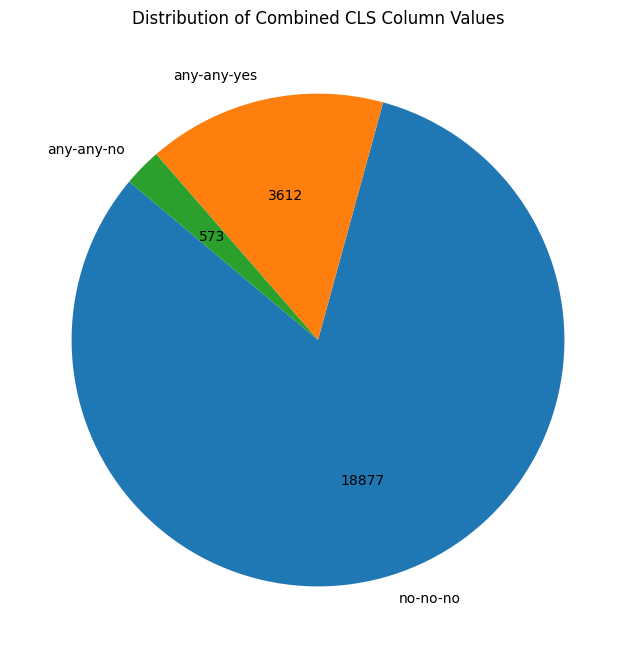

Category
no-no-no       18877
any-any-yes     3612
any-any-no       573
Name: count, dtype: int64


In [49]:
def categorize_row(row):
    if row == 'no-no-no':
        return 'no-no-no'
    elif row.endswith('no'):
        return 'any-any-no'
    else:
        return 'any-any-yes'

vis_df['Category'] = vis_df['Combined_Cols'].apply(categorize_row)

category_counts = vis_df['Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(category_counts) / 100), startangle=140)
plt.title('Distribution of Combined CLS Column Values')
plt.show()

print(category_counts)

In [50]:
print(test_df['CLS_Relevance Yes/No'].head())

print(test_df['CLS_Relevance Yes/No'].unique())

num_rows = test_df.shape[0]
print(f"Number of rows in test_df: {num_rows}")

0     no
1     no
2     no
3    yes
4     no
Name: CLS_Relevance Yes/No, dtype: object
['no' 'yes']
Number of rows in test_df: 23062


In [6]:
import re
from sklearn.model_selection import train_test_split

def clean_text(text):
    # Supprimer les balises HTML
    text = re.sub(r'<.*?>', '', text)
    # Supprimer les caractères non alphanumériques
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Mettre le texte en minuscule
    text = text.lower()
    return text

# Appliquez le nettoyage du texte à l'aide de .loc pour éviter SettingWithCopyWarning
test_df.loc[:, 'cleaned_text'] = test_df['text'].apply(clean_text)

# Split
X_train, X_test, y_train, y_test = train_test_split(test_df['cleaned_text'], test_df['CLS_Relevance Yes/No'].map({'yes': 1, 'no': 0}), test_size=0.2, random_state=42)

test_df.head()


/tmp/ipykernel_43/480128841.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[:, 'cleaned_text'] = test_df['text'].apply(clean_text)


,id,title,text,url,lang,source_lang,created_at,published_at,rssfeed_id,source,...,reference_key,keyword_list,location_list,publication_date,CLS_Lexique Sécurité Alimentaire,CLS_Relevance,CLS_Usefulness,CLS_Relevance Yes/No,CLS_Topic,cleaned_text
0,0BV7191EOS,Passer de 75% à 100% de couverture des cantine...,Passer de 75% à 100% de couverture des cantine...,https://www.24haubenin.info/?Passer-de-75-a-10...,FR,NaN,2022-10-26 20:15:47,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Environement (m),passer de 75 100 de couverture des cantines s...
1,1Z3ZW3BIIC,Le procès des personnes arrêtées au CNHU renvo...,Le procès des personnes arrêtées au CNHU renvo...,https://www.24haubenin.info/?Le-proces-des-per...,FR,NaN,2022-10-26 20:17:15,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Societe (m),le procs des personnes arrtes au cnhu renvoy a...
2,20W0VLVUC3,Nouvel enrôlement au Ravip pour les femmes et ...,Nouvel enrôlement au Ravip pour les femmes et ...,https://www.24haubenin.info/?Nouvel-enrolement...,FR,NaN,2022-10-26 20:13:49,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,yes,no,no,no,Societe (m),nouvel enrlement au ravip pour les femmes et c...
3,7PMCBUVHSC,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,COMPTE RENDU DU CONSEIL DES MINISTRES DU 26 OC...,https://www.24haubenin.info/?COMPTE-RENDU-DU-C...,FR,NaN,2022-10-26 20:09:27,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,yes,yes,yes,yes,Economie (m),compte rendu du conseil des ministres du 26 oc...
4,F2AZ2PPCRZ,Calendrier complet et groupes du CHAN 2022,Calendrier complet et groupes du CHAN 2022\n\n...,https://www.24haubenin.info/?Calendrier-comple...,FR,NaN,2022-10-26 20:14:42,2022-10-25 22:00:00+00:00,b5d565c4b5c4,www.24haubenin.info,...,NaN,NaN,NaN,1.666735e+09,no,no,no,no,Sport (m),calendrier complet et groupes du chan 2022\n\n...


In [8]:
from sklearn.model_selection import train_test_split

X = test_df['text'] 
y = test_df['CLS_Relevance Yes/No'].map({'yes': 1, 'no': 0})  # Mapping 'yes' = 1 et 'no' = 0

# Split  0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Vérifiez la distribution dans l'ensemble d'entrainement 
train_distribution = y_train.value_counts()
print("Training Set Distribution:\n", train_distribution)

# Vérifiez la distribution dans l'ensemble de test
test_distribution = y_test.value_counts()
print("\nTest Set Distribution:\n", test_distribution)

Training Set Distribution:
 CLS_Relevance Yes/No
0    15547
1     2902
Name: count, dtype: int64

Test Set Distribution:
 CLS_Relevance Yes/No
0    3903
1     710
Name: count, dtype: int64


In [10]:

import random
import warnings
import time
import datetime

import pandas as pd
import numpy as np

# PyTorch 
import torch
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Hugging Face Transformers 
from transformers import CamembertTokenizer, CamembertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Scikit-learn packages for modeling and evaluation
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Check for GPU availability
if torch.cuda.is_available():    
    device = torch.device('cuda')
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')


There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [11]:
from transformers import CamembertTokenizer
import torch

# Load the CamemBERT tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize all of the sentences in the training set
def tokenize_and_format(sentences):
    input_ids = []
    attention_masks = []

    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = 512,          # Pad & truncate all sentences
                            pad_to_max_length = True,
                            return_attention_mask = True, # Construct attention masks
                            return_tensors = 'pt',     # Return pytorch tensors
                       )
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# Apply the tokenization function to training and test sets
train_input_ids, train_attention_masks = tokenize_and_format(X_train.tolist())
test_input_ids, test_attention_masks = tokenize_and_format(X_test.tolist())


sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert)

In [14]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Use the tensors directly without concatenating
train_inputs = train_input_ids
train_masks = train_attention_masks
train_labels = torch.tensor(y_train.values)

test_inputs = test_input_ids
test_masks = test_attention_masks
test_labels = torch.tensor(y_test.values)

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=16)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=16)



In [15]:
from transformers import CamembertForSequenceClassification, AdamW

# Load the pre-trained CamemBERT model with a classification head
model = CamembertForSequenceClassification.from_pretrained(
    'camembert-base', 
    num_labels = 2  # Binary classification (yes/no)
)

# Send the model to the appropriate device (GPU or CPU)
model.to(device)

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CamembertForSequenceClassification(
  (roberta): CamembertModel(
    (embeddings): CamembertEmbeddings(
      (word_embeddings): Embedding(32005, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): CamembertEncoder(
      (layer): ModuleList(
        (0-11): 12 x CamembertLayer(
          (attention): CamembertAttention(
            (self): CamembertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): CamembertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=Tru

In [16]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,  # Learning rate
                  eps = 1e-8  # Epsilon value
                 )

from transformers import get_linear_schedule_with_warmup

epochs = 3
# Total number of training steps
total_steps = len(train_dataloader) * epochs  # Number of epochs

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [17]:
def flat_accuracy(preds, labels):
    
    """A function for calculating accuracy scores"""
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    return accuracy_score(labels_flat, pred_flat)

def flat_f1(preds, labels):
    
    """A function for calculating f1 scores"""
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    return f1_score(labels_flat, pred_flat)

In [18]:
def format_time(elapsed):    
    
    """A function that takes a time in seconds and returns a string hh:mm:ss"""
    
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [19]:
# Number of training epochs (authors recommend between 2 and 4)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
epochs = 3

# Training loop
for epoch_i in range(0, epochs):
    
    # Training
    print('\n======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    print("\n  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training took: {:}".format(format_time(time.time() - t0)))
    
    all_predictions = []
    all_actuals = []

    # Validation
    print("\nRunning Validation...")

    t0 = time.time()
    model.eval()
    total_eval_accuracy = 0
    total_eval_f1 = 0
    nb_eval_steps = 0

    for batch in test_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
          # Store predictions and actual labels
        preds = np.argmax(logits, axis=1).flatten()
        all_predictions.extend(preds)
        all_actuals.extend(label_ids)

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        total_eval_f1 += flat_f1(logits, label_ids)
        nb_eval_steps += 1

    avg_val_accuracy = total_eval_accuracy / nb_eval_steps
    avg_val_f1 = total_eval_f1 / nb_eval_steps
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    print("  F1: {0:.2f}".format(avg_val_f1))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("\nTraining complete!")



======== Epoch 1 / 3 ========
Training...
  Batch    40  of  1,154.    Elapsed: 0:00:34.
  Batch    80  of  1,154.    Elapsed: 0:01:07.
  Batch   120  of  1,154.    Elapsed: 0:01:40.
  Batch   160  of  1,154.    Elapsed: 0:02:14.
  Batch   200  of  1,154.    Elapsed: 0:02:48.
  Batch   240  of  1,154.    Elapsed: 0:03:21.
  Batch   280  of  1,154.    Elapsed: 0:03:55.
  Batch   320  of  1,154.    Elapsed: 0:04:28.
  Batch   360  of  1,154.    Elapsed: 0:05:02.
  Batch   400  of  1,154.    Elapsed: 0:05:35.
  Batch   440  of  1,154.    Elapsed: 0:06:09.
  Batch   480  of  1,154.    Elapsed: 0:06:43.
  Batch   520  of  1,154.    Elapsed: 0:07:16.
  Batch   560  of  1,154.    Elapsed: 0:07:50.
  Batch   600  of  1,154.    Elapsed: 0:08:23.
  Batch   640  of  1,154.    Elapsed: 0:08:57.
  Batch   680  of  1,154.    Elapsed: 0:09:30.
  Batch   720  of  1,154.    Elapsed: 0:10:04.
  Batch   760  of  1,154.    Elapsed: 0:10:38.
  Batch   800  of  1,154.    Elapsed: 0:11:11.
  Batch   840  of

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics

  Accuracy: 0.89
  F1: 0.55
  Validation took: 0:01:21

======== Epoch 2 / 3 ========
Training...
  Batch    40  of  1,154.    Elapsed: 0:00:34.
  Batch    80  of  1,154.    Elapsed: 0:01:07.
  Batch   120  of  1,154.    Elapsed: 0:01:41.
  Batch   160  of  1,154.    Elapsed: 0:02:14.
  Batch   200  of  1,154.    Elapsed: 0:02:48.
  Batch   240  of  1,154.    Elapsed: 0:03:22.
  Batch   280  of  1,154.    Elapsed: 0:03:55.
  Batch   320  of  1,154.    Elapsed: 0:04:29.
  Batch   360  of  1,154.    Elapsed: 0:05:02.
  Batch   400  of  1,154.    Elapsed: 0:05:36.
  Batch   440  of  1,154.    Elapsed: 0:06:10.
  Batch   480  of  1,154.    Elapsed: 0:06:43.
  Batch   520  of  1,154.    Elapsed: 0:07:17.
  Batch   560  of  1,154.    Elapsed: 0:07:50.
  Batch   600  of  1,154.    Elapsed: 0:08:24.
  Batch   640  of  1,154.    Elapsed: 0:08:58.
  Batch   680  of  1,154.    Elapsed: 0:09:31.
  Batch   720  of  1,154.    Elapsed: 0:10:05.
  Batch   760  of  1,154.    Elapsed: 0:10:39.
  Batch  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics

  Accuracy: 0.89
  F1: 0.61
  Validation took: 0:01:21

======== Epoch 3 / 3 ========
Training...
  Batch    40  of  1,154.    Elapsed: 0:00:34.
  Batch    80  of  1,154.    Elapsed: 0:01:07.
  Batch   120  of  1,154.    Elapsed: 0:01:41.
  Batch   160  of  1,154.    Elapsed: 0:02:15.
  Batch   200  of  1,154.    Elapsed: 0:02:48.
  Batch   240  of  1,154.    Elapsed: 0:03:22.
  Batch   280  of  1,154.    Elapsed: 0:03:55.
  Batch   320  of  1,154.    Elapsed: 0:04:29.
  Batch   360  of  1,154.    Elapsed: 0:05:03.
  Batch   400  of  1,154.    Elapsed: 0:05:36.
  Batch   440  of  1,154.    Elapsed: 0:06:10.
  Batch   480  of  1,154.    Elapsed: 0:06:44.
  Batch   520  of  1,154.    Elapsed: 0:07:17.
  Batch   560  of  1,154.    Elapsed: 0:07:51.
  Batch   600  of  1,154.    Elapsed: 0:08:25.
  Batch   640  of  1,154.    Elapsed: 0:08:58.
  Batch   680  of  1,154.    Elapsed: 0:09:32.
  Batch   720  of  1,154.    Elapsed: 0:10:05.
  Batch   760  of  1,154.    Elapsed: 0:10:39.
  Batch  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics

  Accuracy: 0.90
  F1: 0.59
  Validation took: 0:01:20

Training complete!


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


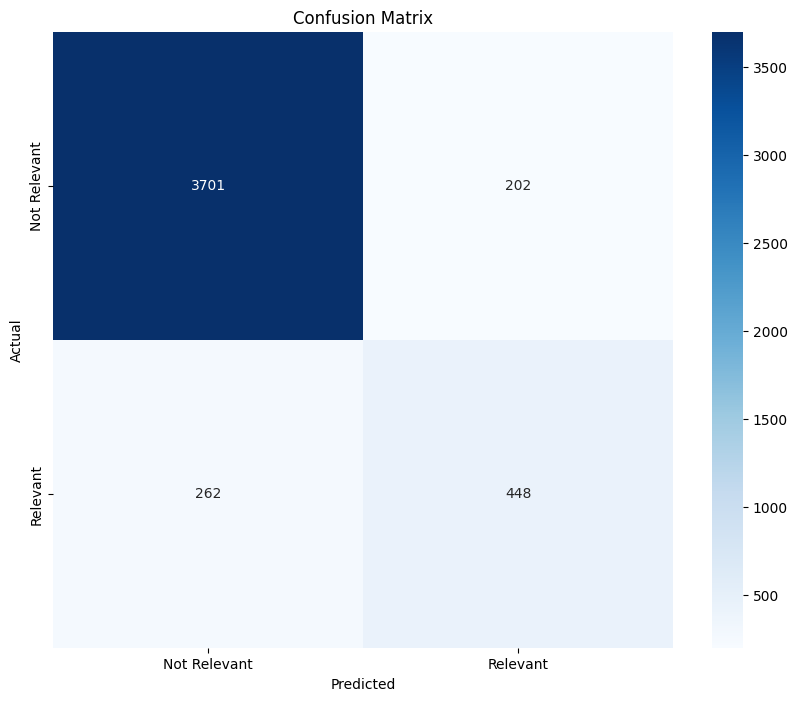

In [20]:
# Generate confusion matrix
conf_matrix = confusion_matrix(all_actuals, all_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()